In [1]:
from LIMxCMBL.init import *

n_bins = 100


# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [19]:
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi_binned = np.mean(np.diff(chi_bin_edges))

In [4]:
def get_binned(base, n_external = 300):
    external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)
    
    oup = np.zeros((100, n_bins, n_bins), dtype=np.float64)
    for i, (l1, r1) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
        for j, (l2, r2) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
            idx1 = np.where((external_chis > l1) & (external_chis <= r1))[0]
            idx2 = np.where((external_chis > l2) & (external_chis <= r2))[0]
            oup[:,i,j] = (np.sum(base[:,
                                      idx1[0]:idx1[-1]+1,
                                      idx2[0]:idx2[-1]+1], 
                                 axis=(1, 2)) / len(idx1) / len(idx2))
    return oup

In [8]:
import matplotlib.pyplot as plt

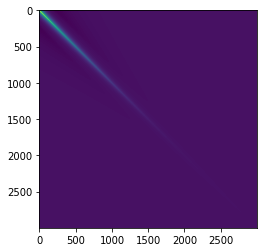

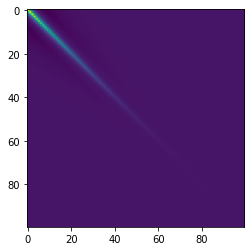

In [9]:
#get <II>

I_I_unbinned = np.load('/scratch/users/delon/LIMxCMBL/I_auto/'+
                          'I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(3000, 
                                                                     zmin, 
                                                                     zmax))

plt.imshow(I_I_unbinned[0])
plt.show()
I_I = get_binned(I_I_unbinned, n_external = 3000)
plt.imshow(I_I[0])


unfiltered_auto = I_I

In [10]:
#bin unfiltered auto

In [11]:
ells[0], ells[37], ells[73], ells[-1]

(10.0, 102.02484912691901, 977.5739027526402, 4999.999999999999)

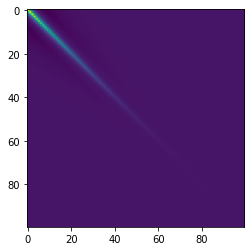

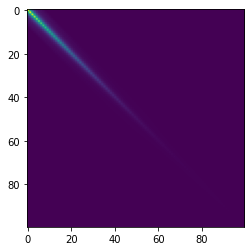

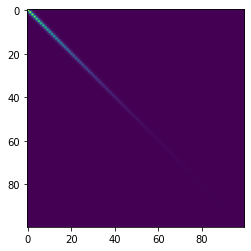

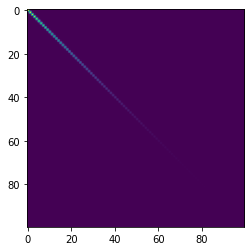

In [12]:
for ell_idx in [0, 37, 73, -1]:
    plt.imshow(unfiltered_auto[ell_idx],)
    plt.show()

In [13]:
cross = {}
ILoILo = {}

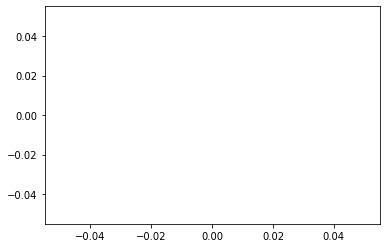

In [14]:
plt.plot(dpi = 1000, figsize=(6,6))
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11",
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
})

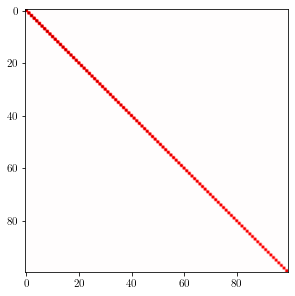

In [21]:
from LIMxCMBL.noise import f_eIeI
fid_eHIeHI = Pei * np.diag(f_eIeI(chi=chi_bin_centers, dchi=dchi_binned, Lambda=0))
vb = np.max(np.abs(fid_eHIeHI))
plt.imshow(fid_eHIeHI, vmin = -vb, vmax = vb, cmap='seismic')

In [22]:
from matplotlib import colors
lin_factor = 2e1
linthresh = vb/lin_factor
norm = colors.SymLogNorm(linthresh=linthresh, 
                         vmin=-vb, 
                         vmax=vb, 
                         base=10)

In [23]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2


0.01
0.1


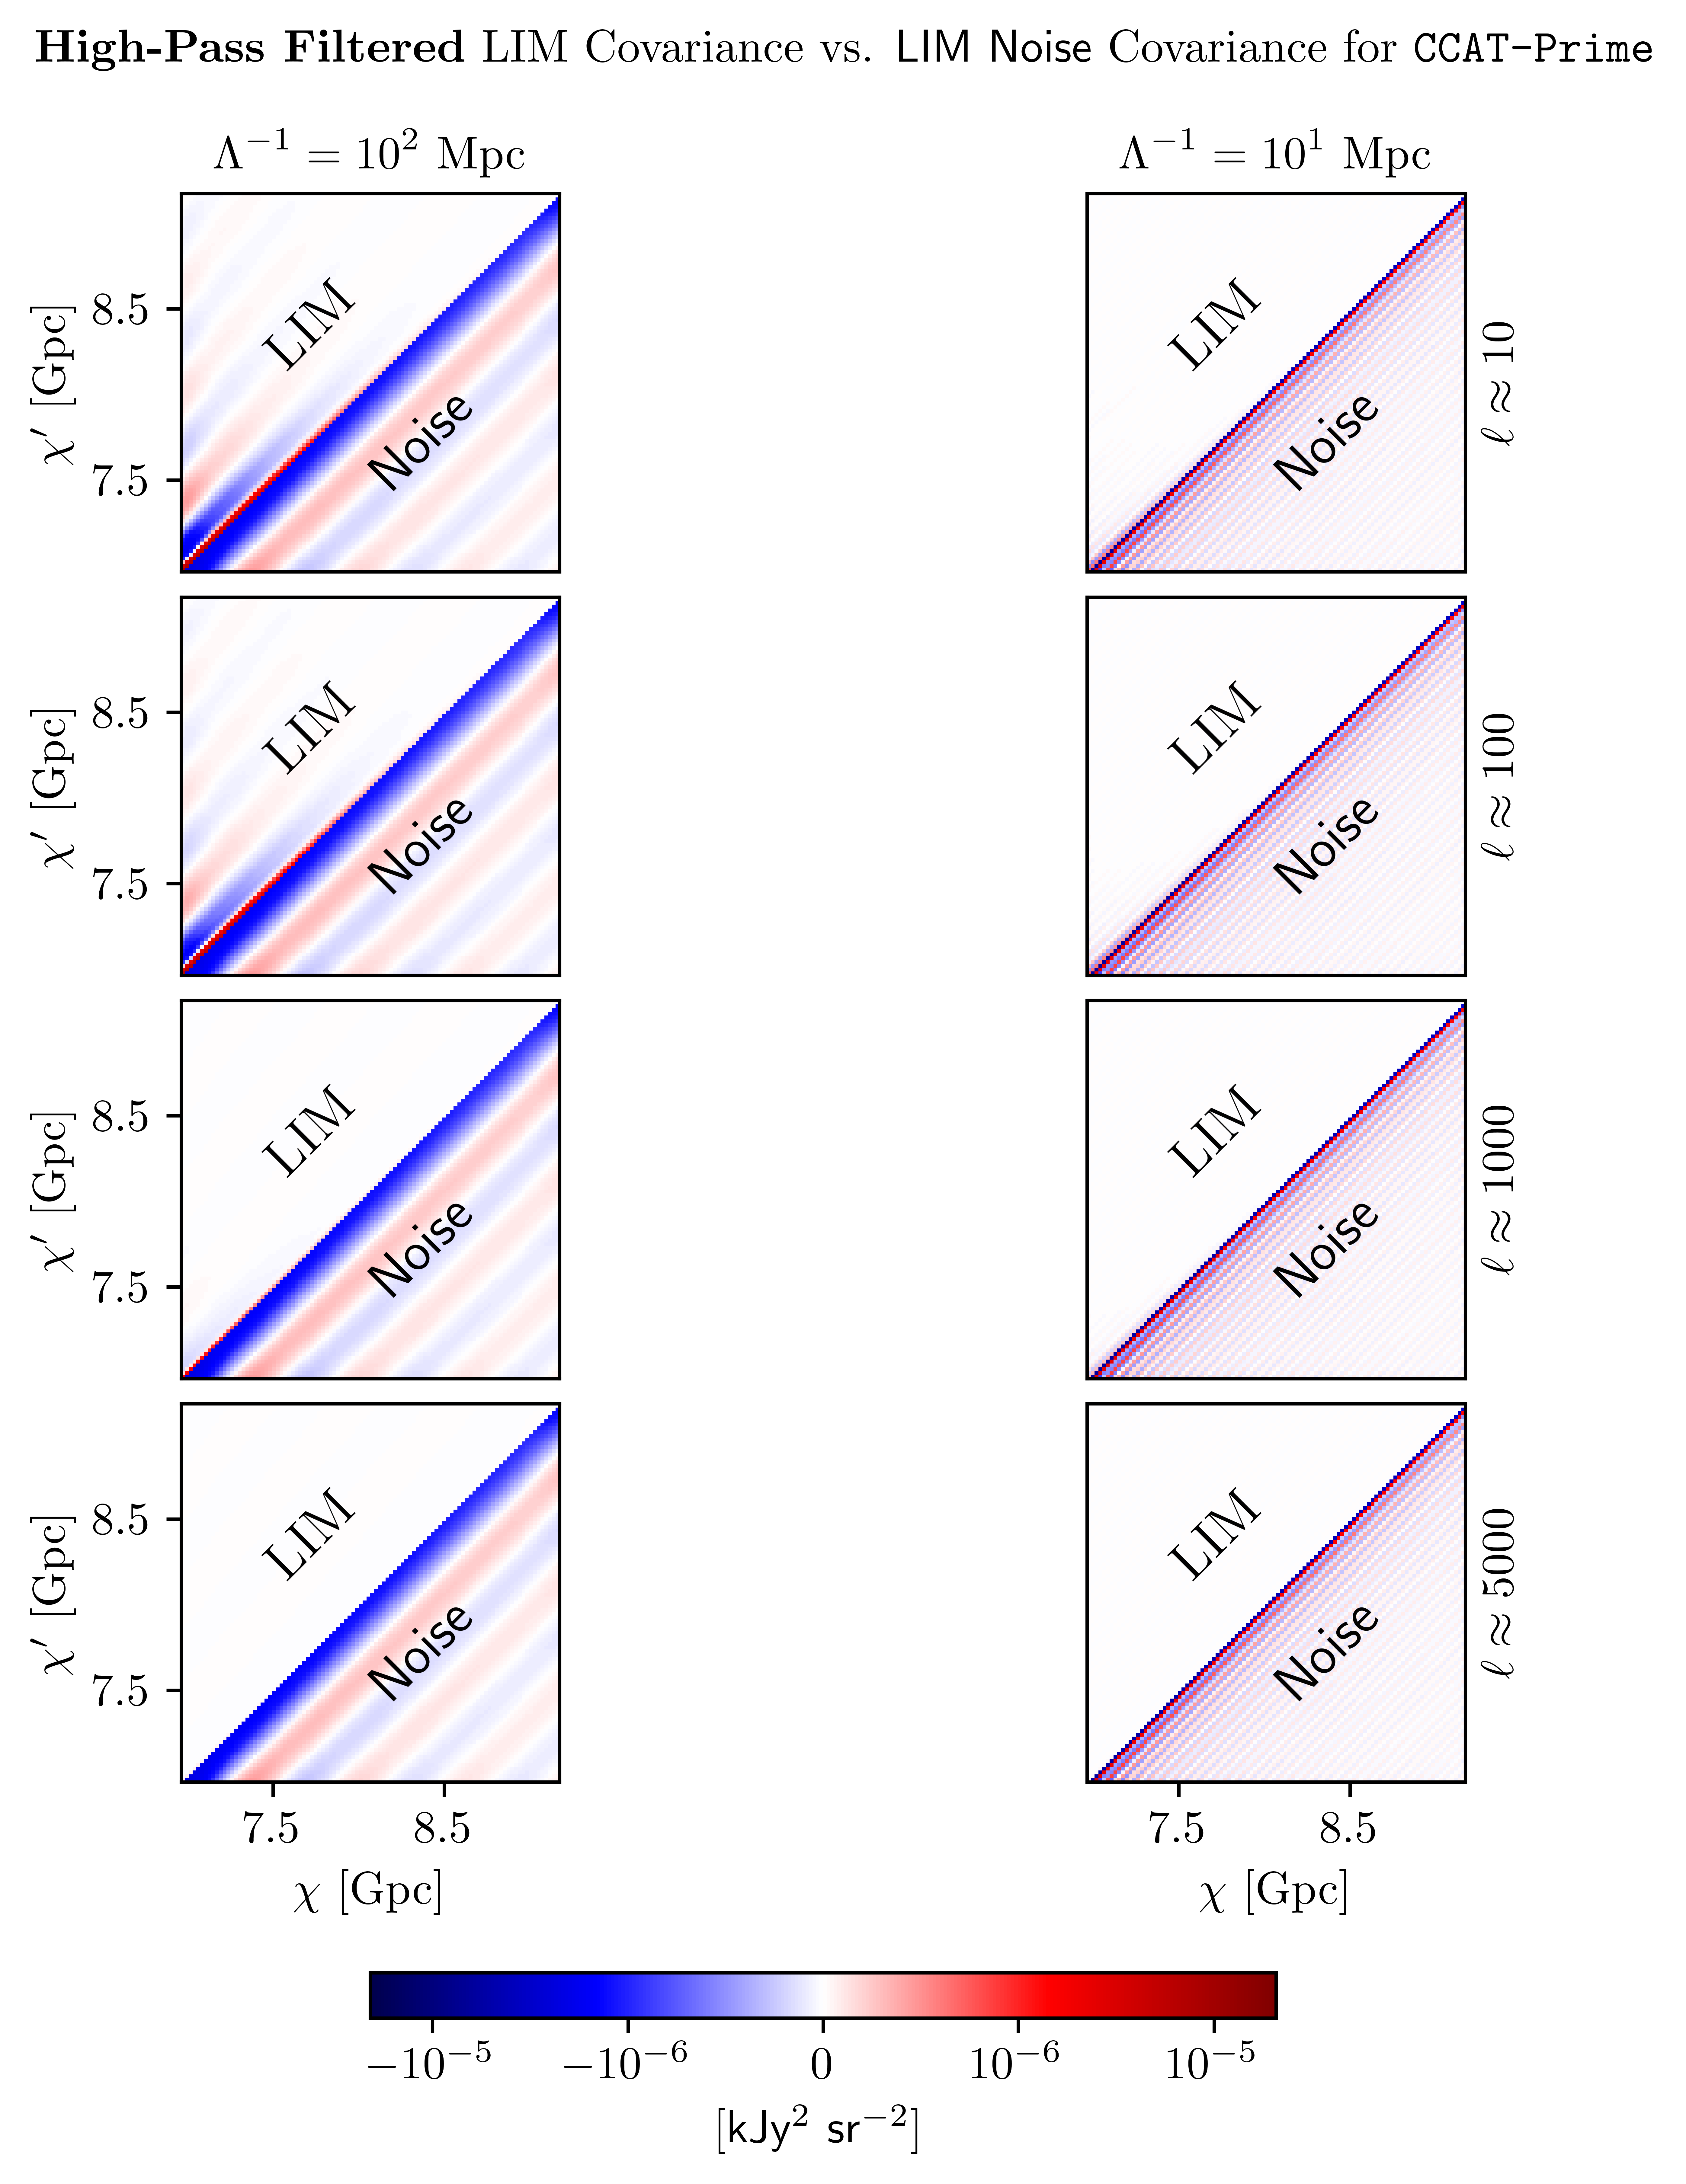

In [31]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (6,6), dpi = 1000,
                        gridspec_kw = {'wspace':0, 'hspace':0})

i=0
Ls = [18,24]
for Lambda_idx in Ls:
    Lambda = Lambdas[Lambda_idx]
    j=0
    
    ####
    comb_n_external = 1201
    comb_unbinned = np.zeros((len(ells), comb_n_external, comb_n_external))
    for ell_idx in range(len(ells)):
        comb_fname = '/scratch/users/delon/LIMxCMBL/I_auto/comb_'
        comb_fname += 'zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_ext_%d_l_%d_jax_quad.npy'%(zmin, zmax, 
                                                                                      Lambda_idx, 
                                                                                      comb_n_external,
                                                                                      ell_idx)


        comb_unbinned[ell_idx] = np.load(comb_fname)
    comb = get_binned(comb_unbinned, n_external = comb_n_external)
    
    IHiIHi = I_I + comb

    ####
    eComb_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_comb_'
    eComb_fname +='zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, 
                                                                               zmax, 
                                                                               Lambda_idx, 
                                                                               n_bins)
    eComb = np.load(eComb_fname)
    eHIeHI = eComb
    eHIeHI *= Pei

    
    print(Lambda)
    for ell_idx in [0, 37, 73, -1]:
        ax = axs[j,i]
        
    
        cov = IHiIHi[ell_idx]
        cov = cov * np.tri(*cov.shape)
        cov[np.where(cov == 0)] = None

        ax.imshow(eHIeHI, norm=norm, cmap='seismic',
                 extent=[chimin/1000, chimax/1000, chimin/1000, chimax/1000],
                 interpolation = 'none',
                 origin = 'lower')
        im = ax.imshow(cov,
                  norm = norm,
                  cmap = 'seismic',
                  extent=[chimin/1000, chimax/1000, chimin/1000, chimax/1000],
                      interpolation = 'none',
                      origin = 'lower')

        ax.set_yticks([])
        ax.set_xticks([])

        
        offset = .15
        ax.text(0.5 - offset, 0.5 + offset, 
            r"LIM",
                transform=ax.transAxes,
            ha='center', va='center', fontsize=13, rotation=45)

        ax.text(0.5 + offset, 0.5 - offset, 
            r"\textsf{Noise}",
                transform=ax.transAxes,
            ha='center', va='center', fontsize=13, rotation=45)
        j += 1
    i+= 1
    

cbar_ax = fig.add_axes([.25, -.05, 0.5, 0.025])  # [left, bottom, width, height]


cbar = fig.colorbar(im, cax=cbar_ax,
                   orientation='horizontal',
                   label=r'[\textsf{kJy${}^2$ sr}${}^{-2}$]')

for i in range(len(axs[0])):
    axs[0,i].set_title(r'$$\Lambda^{-1} = 10^{%d}\ {\rm Mpc}$$'%(-np.log10(Lambdas[Ls[i]])),fontsize=11)
    axs[-1,i].set_xlabel(r"$\chi$ [{\rm Gpc}]",fontsize=11)
    axs[-1,i].set_xticks([7.5, 8.5])


ell_labels = [10, 100, 1000, 5000]
for i in range(len(axs)):
    axs[i,0].set_ylabel(r"$\chi'$ [{\rm Gpc}]",fontsize=11)
    axs[i,0].set_yticks([7.5, 8.5])

    axs[i,-1].set_ylabel(r'$${\ell \approx %d}$$'%(ell_labels[i]),fontsize=11)
    axs[i,-1].yaxis.set_label_position("right")

fig.text(plt_cntr, 1.025, r"\textbf{High-Pass Filtered} LIM Covariance vs. \textsf{LIM Noise} Covariance for \texttt{CCAT-Prime}",
         ha='center', 
         va='bottom', 
        fontsize=11)

plt.savefig('figures/010.003.IHiIHi.pdf', bbox_inches='tight')
